# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration for hypotheses 1: The more bedrooms per entity (square meter) of living area, the lower the price of the house
  * Additional variables are created or renamed and some graphical explorations are performed
  

##### Getting data and settings
###### Getting setting stored in 0_definitions.py file

In [42]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

##### Getting data stored at the end of EDA _3_cleaning.ipynb

In [43]:
df_eda = pd.read_csv('eda3.csv',)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head()

,date_sold,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-12-09,538000.0,6414100192,2,3,2,2570.0,7242.0,2,0,...,7,2170.0,400.0,1951.0,19910.0,98125,47.7210,-122.319,1690.0,7639.0
1,2014-12-09,604000.0,2487200875,4,4,3,1960.0,5000.0,1,0,...,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0
2,2015-02-18,510000.0,1954400510,5,3,2,1680.0,8080.0,1,0,...,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0
3,2014-05-12,1230000.0,7237550310,6,4,4,5420.0,101930.0,1,0,...,11,3890.0,1530.0,2001.0,0.0,98053,47.6561,-122.005,4760.0,101930.0
4,2015-04-15,229500.0,2414600126,9,3,1,1780.0,7470.0,1,0,...,7,1050.0,730.0,1960.0,0.0,98146,47.5123,-122.337,1780.0,8113.0


##### Some extra variables for EDA

In [44]:
# Ratio bedrooms	bathrooms 
# 0.092903 square footage = 1 square meters.
# Rescaling for number of bedrooms/bathrooms by 100 squared meter
# Resacling from footage square to meter square
df_eda['bedrooms_for_100sqlivmeter']=(df_eda["bedrooms"]/(df_eda["sqft_living"]*0.092903))*100
df_eda['bethrooms_for_100sqliving'] =(df_eda["bathrooms"]/(df_eda["sqft_living"]*0.092903))*100
# rescaling price for interpretation
df_eda['price'] = df_eda['price'] / 100000


##### Categorial variables for beth and bedrooms

In [ ]:
# Define bins and labels
bins = [0, 0.7, 1.6, 3, float('inf')]
labels = ['Very Low (0-1)', 'Low (1-2)', 'Medium (2-3)', 'High (3+)']
# Apply pd.cut to bin the data
df_eda['bedrooms_100'] = pd.cut(df_eda['bedrooms_for_100sqlivmeter'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column
bins = [0, 0.3, 1,  float('inf')]
labels = ['Very Low (0-0.3)', 'Low (0.3-1)', 'High (1+)']
df_eda['bethrooms_100'] = pd.cut(df_eda['bethrooms_for_100sqliving'], bins=bins, labels=labels)
df_eda.head()

##### Price destribution by bethrooms per 100 sqm  

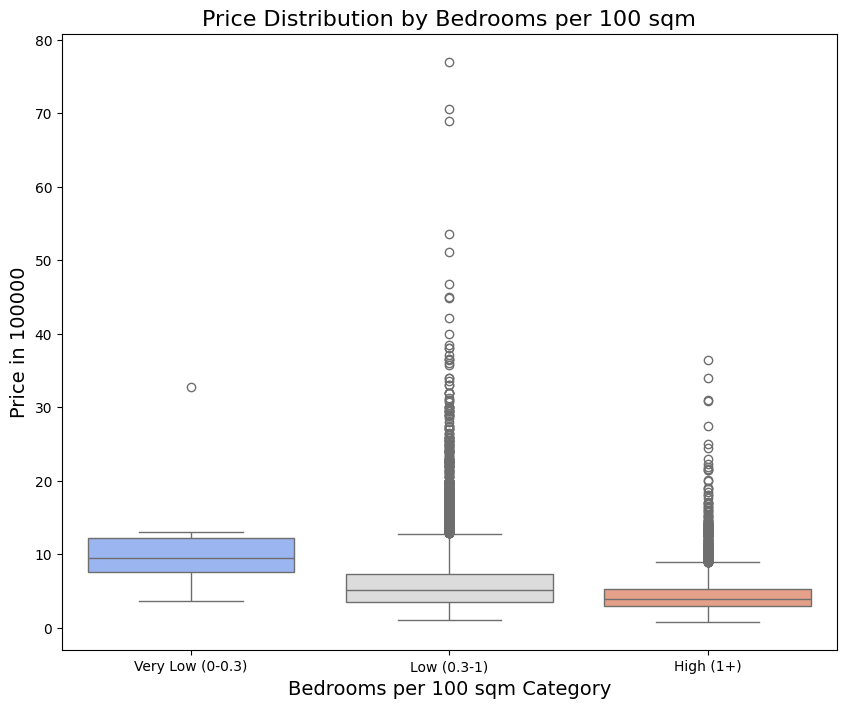

In [50]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='bethrooms_100',  # Binned categories
    y='price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by Bedrooms per 100 sqm', fontsize=16)  # Title with larger font size
plt.xlabel('Bedrooms per 100 sqm Category', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.show()  # Display the boxplot

##### Price destribution by bedrooms per 100 sqm  

In [41]:
s plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='bedrooms_100',  # Binned categories
    y='price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by Bedrooms per 100 sqm', fontsize=16)  # Title with larger font size
plt.xlabel('Bedrooms per 100 sqm Category', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.show()  # Display the boxplot

SyntaxError: invalid syntax (2573487807.py, line 1)

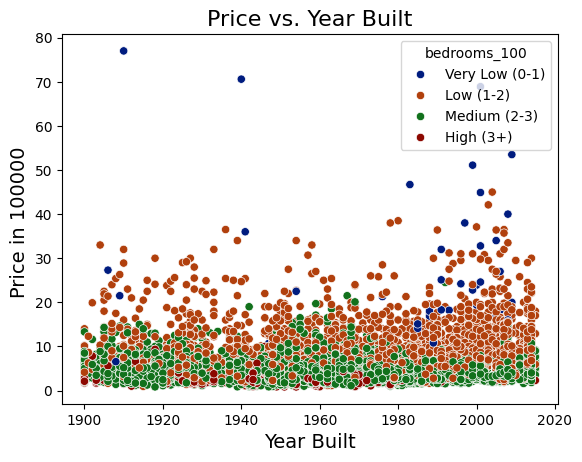

In [19]:

sns.scatterplot(data=df_eda, x='yr_built', y='price', 
                    hue='bedrooms_100', palette='dark')

# Adding labels and title
plt.title('Price vs. Year Built', fontsize=16)  # Title with larger font size
plt.xlabel('Year Built', fontsize=14)  # X-axis label
plt.ylabel('Price in 100000 ', fontsize=14)  # Y-axis label

plt.show() 


##### Correlation between Ratio bedrooms/bethrooms to square meter and price

Text(70.7222222222222, 0.5, 'Features')

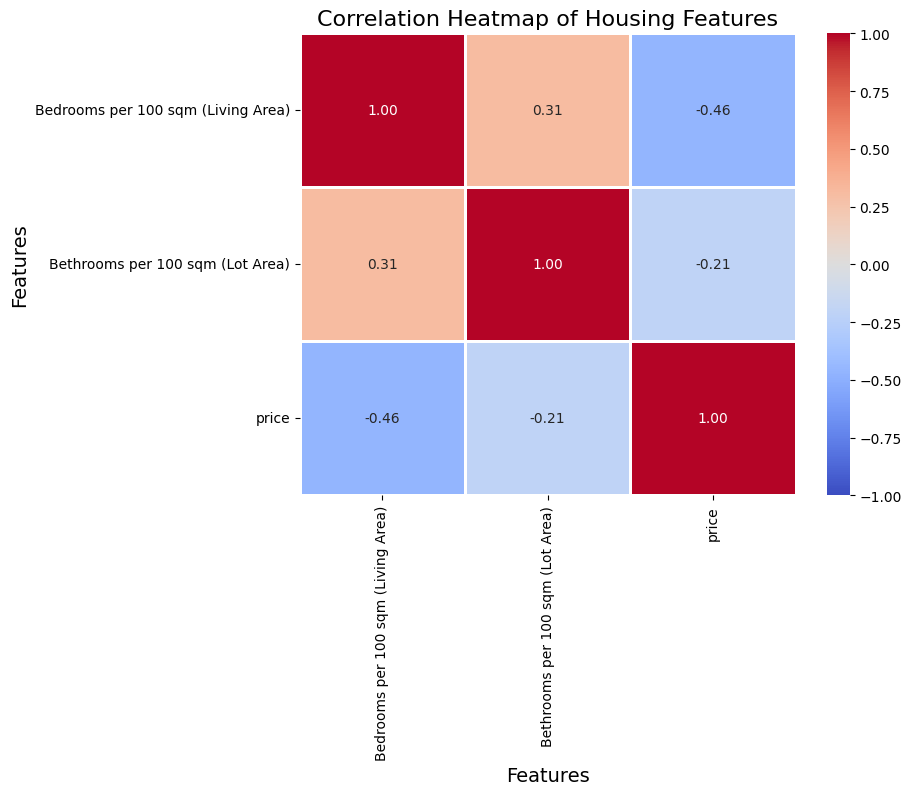

In [20]:
new_column_names = {
    'bedrooms_for_100sqlivmeter': 'Bedrooms per 100 sqm (Living Area)',
    'bethrooms_for_100sqliving': 'Bethrooms per 100 sqm (Lot Area)',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size


#### Save data for next steps

In [21]:
df_eda.to_csv("eda4.csv")
